In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import time
from sklearn.metrics import accuracy_score,  f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
import random
import time
import collections
import warnings
%matplotlib inline

In [2]:
train_tcga_df = pd.read_csv('/Users/shruti/Documents/train_tcga_expression_matrix_processed.tsv', header=0, sep='\t')
test_tcga_df = pd.read_csv('/Users/shruti/Documents/GitHub/Gene-compression-and-Cancer-type-classification/data/test_tcga_expression_matrix_processed.tsv', header=0, sep='\t')

labels_tcga_df = pd.read_csv('/Users/shruti/Documents/GitHub/Gene-compression-and-Cancer-type-classification/data/tcga_sample_identifiers.tsv', header=0, sep='\t')

In [3]:
train_tcga_df.head()

,sample_id,1,10,100,1000,10000,10001,10002,10003,100037417,...,9987,9988,9989,999,9990,9991,9992,9993,9994,9997
0,TCGA-LL-A73Z-01,202.0,28.5,329.0,84.5,492.0,448.0,4.590,14.70,337.0,...,3430.0,717.0,1800.0,6360.0,299.0,2310.0,10.60,3190.0,337.0,892.0
1,TCGA-55-8207-01,77.5,22.5,74.5,13.1,784.0,333.0,2.540,176.00,153.0,...,6050.0,923.0,2490.0,11300.0,1150.0,4030.0,9.08,2890.0,316.0,301.0
2,TCGA-FF-A7CR-01,152.0,0.0,3020.0,26.6,486.0,497.0,0.000,8.47,348.0,...,4930.0,897.0,861.0,39.7,464.0,3320.0,0.00,1330.0,606.0,558.0
3,TCGA-BK-A13C-11,80.5,40.0,70.6,284.0,2420.0,325.0,1.200,91.40,231.0,...,3890.0,737.0,1410.0,10.9,1120.0,1990.0,5.24,3090.0,673.0,263.0
4,TCGA-EB-A6L9-06,319.0,0.0,422.0,184.0,423.0,392.0,0.945,2.36,585.0,...,1930.0,328.0,1340.0,7010.0,450.0,563.0,10.90,3780.0,37.3,1120.0


In [4]:
test_tcga_df.head()

,sample_id,1,10,100,1000,10000,10001,10002,10003,100037417,...,9987,9988,9989,999,9990,9991,9992,9993,9994,9997
0,TCGA-CN-5365-01,70.5,0.000,1310.0,18.70,73.9,757.0,1.82,10.50,414.0,...,2730.0,612.0,5780.0,10400.0,879.0,3830.0,4.10,4220.0,308.0,1300.0
1,TCGA-LP-A7HU-01,27.8,0.949,517.0,6.17,63.6,365.0,4.27,9.02,633.0,...,4510.0,543.0,1360.0,4960.0,510.0,2220.0,17.60,2410.0,233.0,993.0
2,TCGA-22-5491-11,87.6,3.760,88.3,14.40,642.0,295.0,6.84,59.90,159.0,...,4420.0,479.0,2190.0,4480.0,870.0,2120.0,5.13,5030.0,285.0,530.0
3,TCGA-CS-6667-01,75.8,0.000,55.6,2720.00,2170.0,281.0,3.90,9.57,251.0,...,5460.0,1550.0,1370.0,12.8,1430.0,601.0,23.70,7530.0,473.0,258.0
4,TCGA-20-1684-01,63.1,0.703,75.2,4500.00,792.0,433.0,1.64,4.16,623.0,...,5200.0,812.0,1070.0,8410.0,505.0,1170.0,14.80,1910.0,281.0,221.0


In [5]:
labels_tcga_df.head()

,sample_id,sample_type,cancer_type
0,TCGA-02-0047-01,Primary Solid Tumor,GBM
1,TCGA-02-0055-01,Primary Solid Tumor,GBM
2,TCGA-02-2483-01,Primary Solid Tumor,GBM
3,TCGA-02-2485-01,Primary Solid Tumor,GBM
4,TCGA-02-2486-01,Primary Solid Tumor,GBM


In [6]:
train_id = train_tcga_df['sample_id']
test_id = test_tcga_df['sample_id']
label_id = labels_tcga_df['sample_id']

In [7]:
merge_train = []
merge_test = []

for i in train_id:
    val = labels_tcga_df.loc[labels_tcga_df['sample_id'] == i]
    merge_train.append(str(val['cancer_type']).split()[1])
    
for i in test_id:
    val = labels_tcga_df.loc[labels_tcga_df['sample_id'] == i]
    merge_test.append(str(val['cancer_type']).split()[1])

In [8]:
train_tcga_df['cancer_type'] = merge_train
train_tcga_df.head()

,sample_id,1,10,100,1000,10000,10001,10002,10003,100037417,...,9988,9989,999,9990,9991,9992,9993,9994,9997,cancer_type
0,TCGA-LL-A73Z-01,202.0,28.5,329.0,84.5,492.0,448.0,4.590,14.70,337.0,...,717.0,1800.0,6360.0,299.0,2310.0,10.60,3190.0,337.0,892.0,BRCA
1,TCGA-55-8207-01,77.5,22.5,74.5,13.1,784.0,333.0,2.540,176.00,153.0,...,923.0,2490.0,11300.0,1150.0,4030.0,9.08,2890.0,316.0,301.0,LUAD
2,TCGA-FF-A7CR-01,152.0,0.0,3020.0,26.6,486.0,497.0,0.000,8.47,348.0,...,897.0,861.0,39.7,464.0,3320.0,0.00,1330.0,606.0,558.0,DLBC
3,TCGA-BK-A13C-11,80.5,40.0,70.6,284.0,2420.0,325.0,1.200,91.40,231.0,...,737.0,1410.0,10.9,1120.0,1990.0,5.24,3090.0,673.0,263.0,UCEC
4,TCGA-EB-A6L9-06,319.0,0.0,422.0,184.0,423.0,392.0,0.945,2.36,585.0,...,328.0,1340.0,7010.0,450.0,563.0,10.90,3780.0,37.3,1120.0,SKCM


In [9]:
test_tcga_df['cancer_type'] = merge_test
test_tcga_df.head()

,sample_id,1,10,100,1000,10000,10001,10002,10003,100037417,...,9988,9989,999,9990,9991,9992,9993,9994,9997,cancer_type
0,TCGA-CN-5365-01,70.5,0.000,1310.0,18.70,73.9,757.0,1.82,10.50,414.0,...,612.0,5780.0,10400.0,879.0,3830.0,4.10,4220.0,308.0,1300.0,HNSC
1,TCGA-LP-A7HU-01,27.8,0.949,517.0,6.17,63.6,365.0,4.27,9.02,633.0,...,543.0,1360.0,4960.0,510.0,2220.0,17.60,2410.0,233.0,993.0,CESC
2,TCGA-22-5491-11,87.6,3.760,88.3,14.40,642.0,295.0,6.84,59.90,159.0,...,479.0,2190.0,4480.0,870.0,2120.0,5.13,5030.0,285.0,530.0,LUSC
3,TCGA-CS-6667-01,75.8,0.000,55.6,2720.00,2170.0,281.0,3.90,9.57,251.0,...,1550.0,1370.0,12.8,1430.0,601.0,23.70,7530.0,473.0,258.0,LGG
4,TCGA-20-1684-01,63.1,0.703,75.2,4500.00,792.0,433.0,1.64,4.16,623.0,...,812.0,1070.0,8410.0,505.0,1170.0,14.80,1910.0,281.0,221.0,OV


In [10]:
def returnDf2(c_type):
    df2  = train_tcga_df.drop(['sample_id'], axis=1)

    fraction = collections.Counter(merge_train)[c_type]/len(merge_train)

    df2_0 = df2[df2.cancer_type!=c_type]
    df2_0.loc[:,"cancer_type"] = 0
    df2_0 = df2_0.sample(frac = fraction)

    df2_1 = df2[df2.cancer_type==c_type]
    df2_1.loc[:,"cancer_type"] = 1

    df2 = pd.concat([df2_0, df2_1])
    df2["cancer_type"] = df2["cancer_type"].astype('int')

    return df2

In [11]:
def returnTest2(c_type):
    test2  = test_tcga_df.drop(['sample_id'], axis=1)

    fraction = collections.Counter(merge_test)[c_type]/len(merge_test)

    test2_0 = test2[test2.cancer_type!=c_type]
    test2_0.loc[:,"cancer_type"] = 0
    test2_0 = test2_0.sample(frac = fraction)

    test2_1 = test2[test2.cancer_type==c_type]
    test2_1.loc[:,"cancer_type"] = 1

    test2 = pd.concat([test2_0, test2_1])
    test2 = test2.astype('int')
    return test2

In [12]:
def runSVM(df2, test2):
    #first Support vector machine classifier with 16149 variables
    time_laps = []
    for i in range(4):
        start_time = time.time()
        clf = LogisticRegression(random_state=0).fit(df2.iloc[:,0:df2.shape[1]],df2["cancer_type"])
#         clf = svm.SVC(kernel='linear')
#         clf.fit(df2.iloc[:,0:df2.shape[1]],df2["cancer_type"])
        pred = clf.predict(test2.iloc[:,0:test2.shape[1]])
        accuracy = accuracy_score(test2.cancer_type,pred)
        laps = time.time() - start_time
        time_laps.append(laps)
    avg_time_laps = np.mean(time_laps)
    SVM_accuracy = accuracy
    SVM_computation_time = avg_time_laps
    return SVM_accuracy, SVM_computation_time

In [13]:
def returnICA(df2, test2):
    warnings.filterwarnings("ignore")

    start_time = time.time()
    # Normalizing the full dataframe
    new = pd.concat([df2,test2],axis=0)
    standard = StandardScaler()
    result = standard.fit_transform(new.iloc[:,0:new.shape[1]])
    result = pd.DataFrame(result)

    # PCA calculation
    ica = FastICA(n_components=min(800, result.shape[0], result.shape[1]))
    independent_comp = ica.fit_transform(result)
    ica_time = time.time()-start_time


    independent_comp = pd.DataFrame(independent_comp)
#     explanation = ica.explained_variance_ratio_
#     cummulative_sum = explanation.cumsum()

#     print("Time to compute PCA {}".format(pca_time))


#     plt.figure(figsize=(14,6))
#     plt.plot(cummulative_sum*100,linewidth=4)
#     plt.xlabel("Number of Variables in Use",size=15,color="darkred")
#     plt.ylabel("Variability Explained in %",size=15,color="darkred")
#     plt.title("Almost 90% Variablity explained by 800 Variables",size=20,color="darkred")
    return independent_comp, ica_time

In [14]:
def prepICAClassifier(df2, test2, independent_comp):
    y_col = pd.concat([df2.cancer_type,test2.cancer_type],axis=0)
    independent_comp = pd.DataFrame(independent_comp)
    independent_comp = pd.concat([independent_comp,y_col.reset_index()],axis=1).drop("index",axis=1)
    train_x,test_x,train_y,test_y = train_test_split(independent_comp.iloc[:,0:independent_comp.shape[1]],independent_comp.cancer_type,test_size=0.25)
    return train_x,test_x,train_y,test_y

In [15]:
# SVM model after ICA

def ICAClassifier(train_x, train_y, test_x, test_y):
    com_time_laps=[]
    for i in range(4):
        start_time = time.time()
        clf2 = LogisticRegression(random_state=0).fit(train_x,train_y)
#         clf2 = svm.SVC()
#         clf2.fit(train_x,train_y)
        accuracy = accuracy_score(clf2.predict(test_x),test_y) 
        time_laps_after_ica = time.time() - start_time
        com_time_laps.append(time_laps_after_ica)
#     print("The accuracy is {} and computaiton time is {}".format(accuracy,np.mean(com_time_laps)))
        lis = [accuracy,np.mean(com_time_laps)]
    return accuracy, np.mean(com_time_laps)

In [16]:
c_type_list = collections.Counter(merge_train)
# c_type_list = ['LUAD', 'LGG', 'PRAD', 'STAD']
#c_type_list = ['DLBC']
cols = ['cancer_type', 'Full-data acc.', 'Full-data comp. time', 'ICA components', 'ICA calc. time', 'ICA acc.']

results_df = pd.DataFrame(columns = cols)

i = 0
for c_type in c_type_list:
    print(str(i) + ", " + c_type)
    df2 = returnDf2(c_type)
    test2 = returnTest2(c_type)
    accuracy, avg_time_laps = runSVM(df2, test2)
    independent_comp,  ica_time = returnICA(df2, test2)
    train_x,test_x,train_y,test_y = prepICAClassifier(df2, test2, independent_comp)
    ica_acc, ica_time = ICAClassifier(train_x, train_y, test_x, test_y)
    results_df.loc[i] = [c_type, accuracy,avg_time_laps, len(independent_comp),ica_time, ica_acc]
    i = i+1

0, BRCA


/Users/shruti/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/shruti/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shruti/opt/anaconda3/lib/python3.8/site-packag

1, LUAD
2, DLBC
3, UCEC
4, SKCM
5, PRAD
6, HNSC
7, KIRP
8, CESC
9, THCA
10, KIRC
11, STAD
12, COAD
13, READ
14, LGG
15, MESO
16, LAML
17, BLCA
18, OV
19, LUSC
20, ACC
21, THYM
22, ESCA
23, PAAD
24, LIHC
25, SARC
26, GBM
27, TGCT
28, KICH
29, PCPG
30, UCS
31, UVM
32, CHOL


In [17]:
results_df

,cancer_type,Full-data acc.,Full-data comp. time,ICA components,ICA calc. time,ICA acc.
0,BRCA,0.974026,2.114256,2302,0.027717,1.0
1,LUAD,0.990991,1.147273,1122,0.019967,1.0
2,DLBC,1.000000,0.230042,96,0.003888,1.0
3,UCEC,0.954128,1.040235,1105,0.016841,1.0
4,SKCM,1.000000,0.866373,928,0.013967,1.0
5,PRAD,1.000000,0.762092,1072,0.018428,1.0
6,HNSC,0.963303,1.213960,1103,0.016092,1.0
7,KIRP,0.984615,0.606305,637,0.010285,1.0
8,CESC,0.934426,0.736889,611,0.010590,1.0
9,THCA,1.000000,0.592388,1115,0.016504,1.0


In [18]:
df2 = returnDf2(c_type='BRCA')
test2 = returnTest2(c_type='BRCA')
new = pd.concat([df2,test2],axis=0)
standard = StandardScaler()
result = standard.fit_transform(new.iloc[:,0:new.shape[1]])
result = pd.DataFrame(result)

In [20]:
acc = []
acc_nb = []
f1_svm = []
list1= [2,10,16,25,50,100,200,400,1000]
for i in (list1):
    ica = FastICA(n_components=i)
    principal_comp = ica.fit_transform(result)
    principal_comp = pd.DataFrame(principal_comp)
    y_col = pd.concat([df2.cancer_type,test2.cancer_type],axis=0)
    principal_comp = pd.DataFrame(principal_comp)
    principal_comp = pd.concat([principal_comp,y_col.reset_index()],axis=1).drop("index",axis=1)

    #SVM
    train_x,test_x,train_y,test_y = train_test_split(principal_comp.iloc[:,0:(principal_comp.shape[1]-1)],principal_comp.cancer_type,test_size=0.45)
    
    clf2 = LogisticRegression(random_state=0).fit(train_x,train_y)
#     clf2 = svm.SVC(kernel='linear',gamma="auto",C=0.001)
#     clf2.fit(train_x,train_y)
    a = accuracy_score(clf2.predict(test_x),test_y) 
    
    f1_ = f1_score(test_y, clf2.predict(test_x))
    f1_svm.append(f1_)
    acc.append(a)
    
    
    

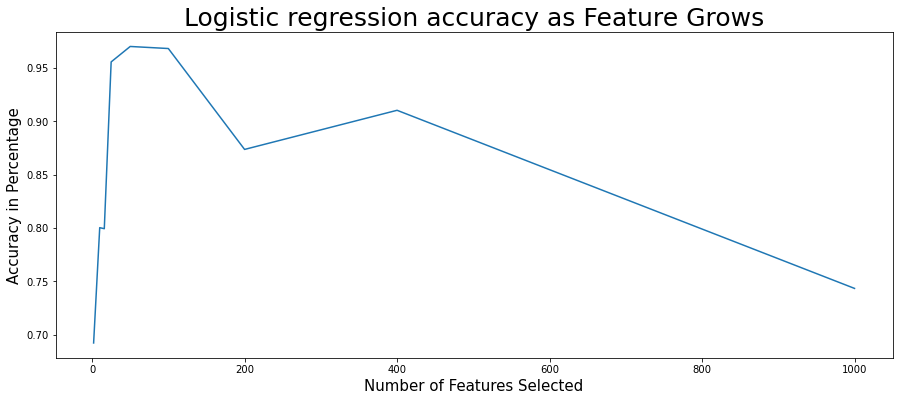

In [22]:
plt.figure(figsize=(15,6))
plt.plot([i for i in list1],acc)
plt.xlabel("Number of Features Selected",size=15)
plt.ylabel("Accuracy in Percentage",size=15)
plt.title("Logistic regression accuracy as Feature Grows",size=25)
plt.style.use("bmh")